In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:\study materials\python\02 Machine Learning - Udemy\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class',axis=1)

In [5]:
X = pd.get_dummies(X,drop_first=True)

In [7]:
y = df['class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {'n_estimators': [50,100],
             'learning_rate':[0.1,0.005,0.2],
             'max_depth':[3,4,5]}

In [13]:
gb_model = GradientBoostingClassifier()

In [14]:
grid = GridSearchCV(gb_model,param_grid)

In [15]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.005, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [16]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay, accuracy_score

In [17]:
predictions = grid.predict(X_test)

In [18]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [23]:
grid.best_estimator_.feature_importances_

array([1.71990251e-04, 2.47852223e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.68661908e-03, 2.39127206e-16, 8.82078498e-16,
       0.00000000e+00, 4.36377102e-17, 1.49392807e-16, 0.00000000e+00,
       1.05610545e-16, 0.00000000e+00, 0.00000000e+00, 1.18233657e-17,
       2.38983263e-03, 5.48879396e-02, 1.30525988e-04, 1.43625084e-02,
       2.07370954e-02, 1.30775093e-04, 6.15607813e-01, 6.24984488e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.22239354e-02,
       1.06415317e-02, 0.00000000e+00, 0.00000000e+00, 1.10629137e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.96575589e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.57596865e-04, 3.20841196e-04, 1.28900548e-01, 3.03211335e-03,
       2.05799937e-02, 1.73451352e-03, 8.92928540e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.79891112e-02, 2.40683574e-04,
       0.00000000e+00, 0.00000000e+00, 4.36930144e-04, 0.00000000e+00,
      

In [24]:
feat_import = grid.best_estimator_.feature_importances_

In [25]:
imp_feat = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [26]:
imp_feat

,Importance
cap-shape_c,1.719903e-04
cap-shape_f,2.478522e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,6.368527e-17


In [27]:
imp_feat = imp_feat[imp_feat['Importance']>0.005]

In [28]:
imp_feat = imp_feat.sort_values('Importance')

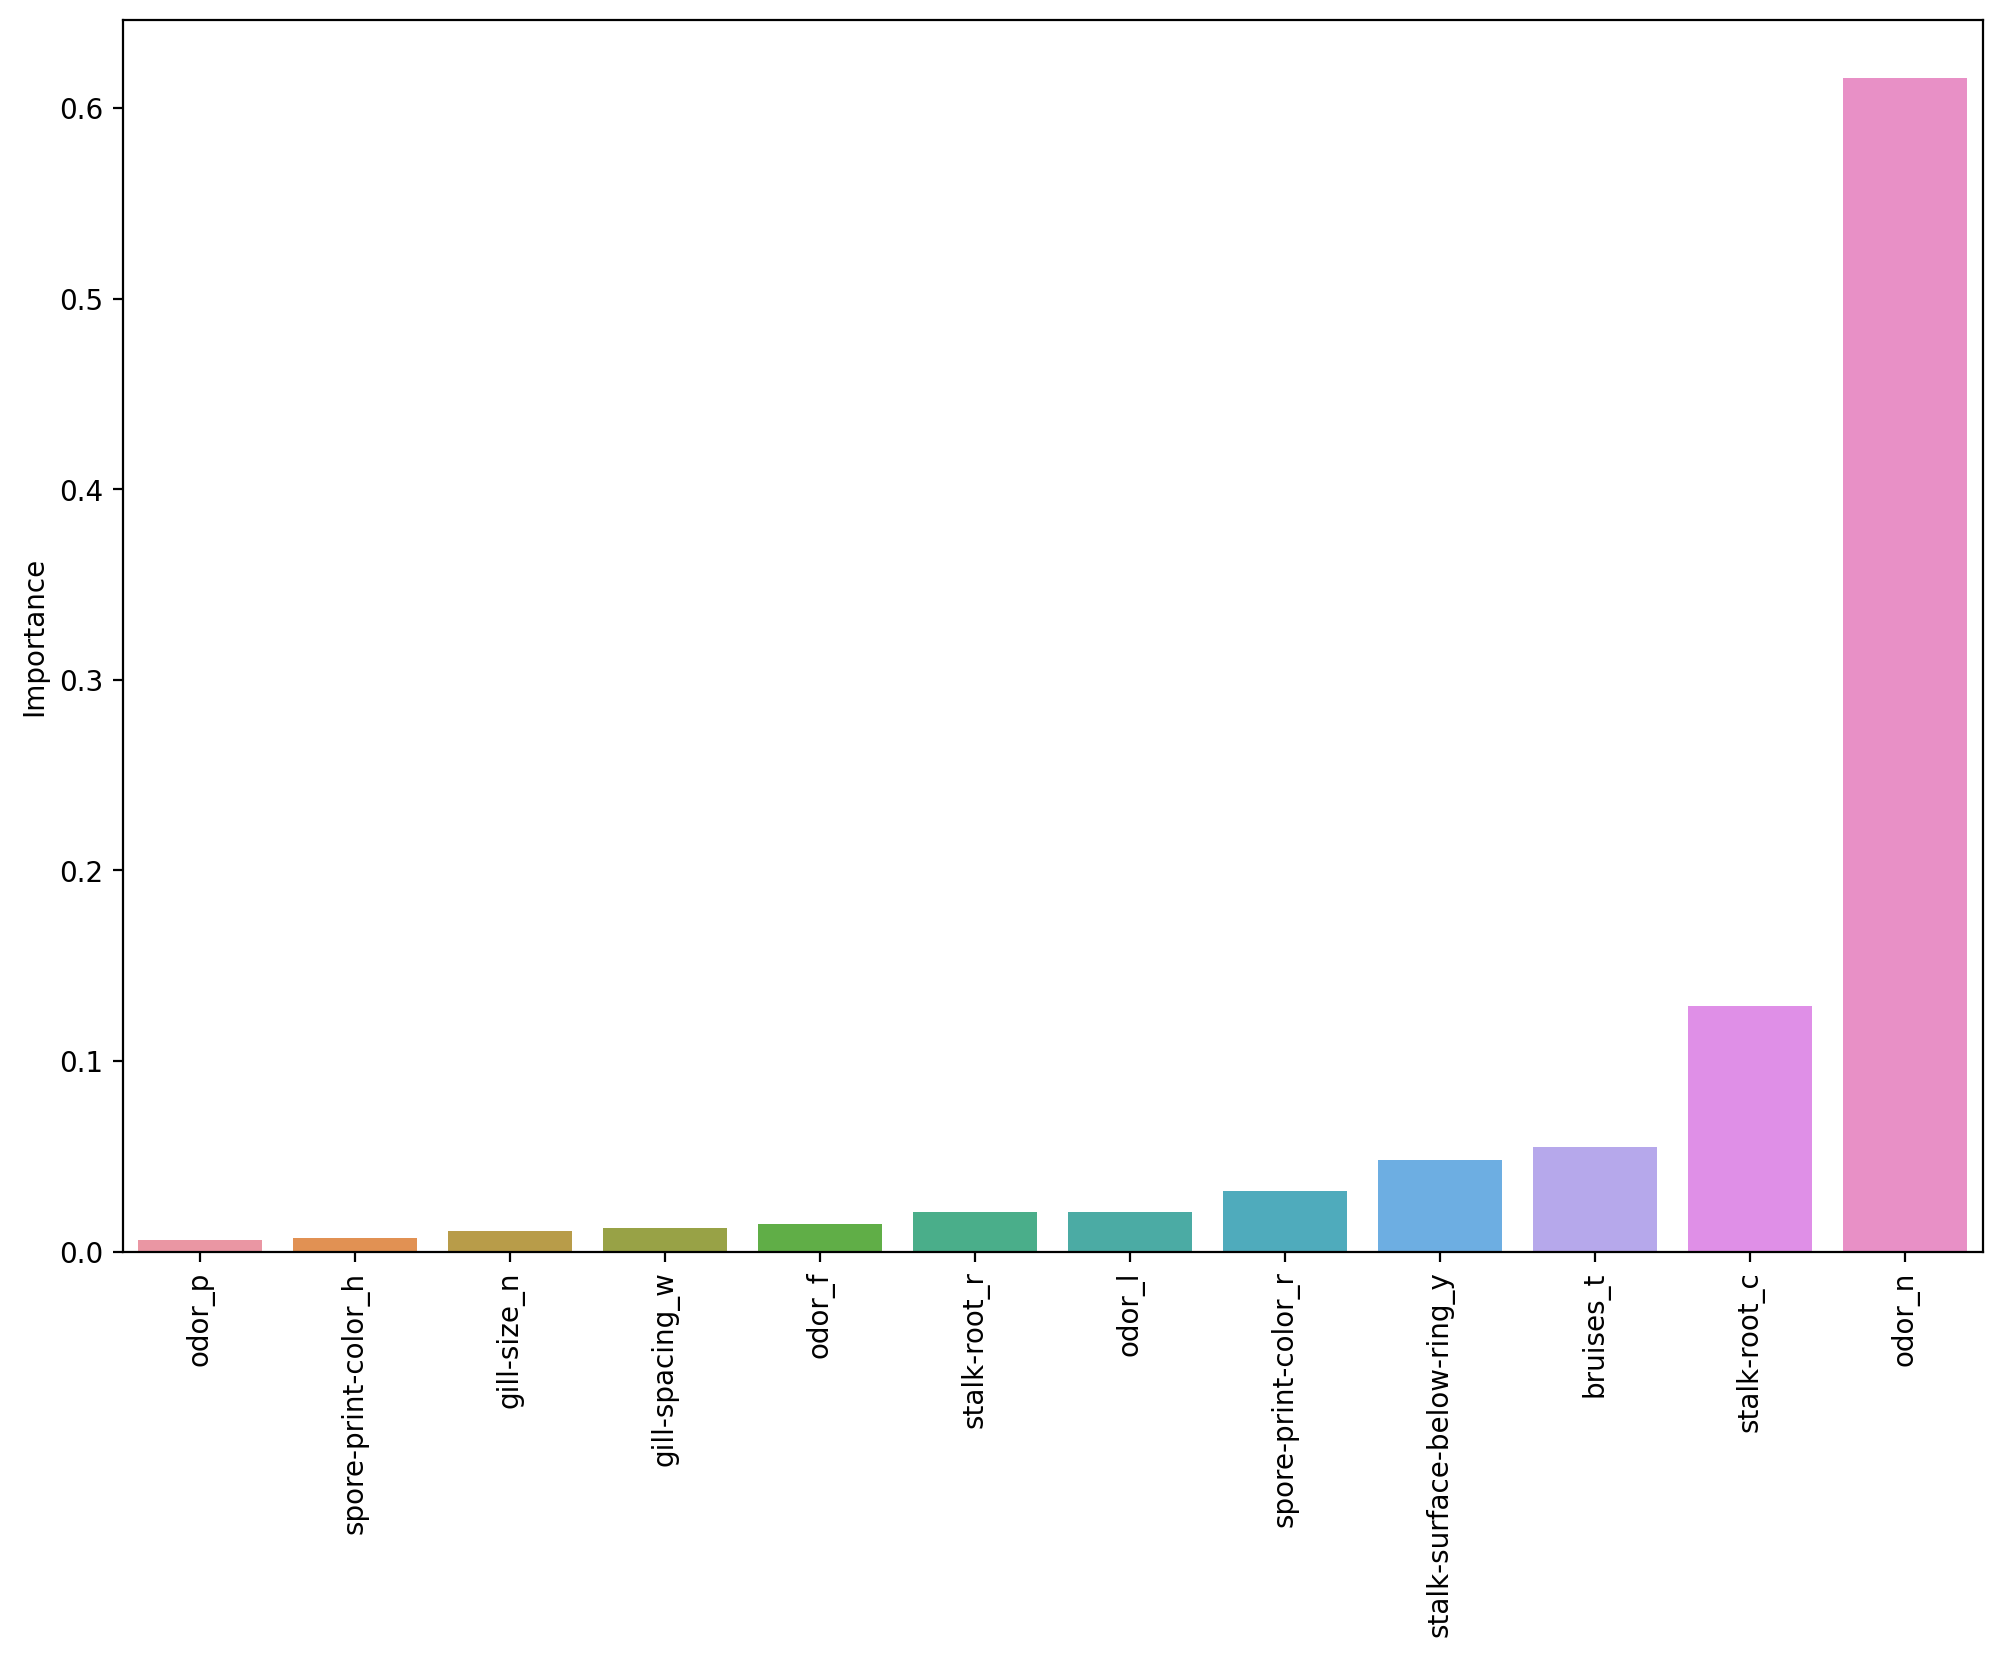

In [31]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);